In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from kinetic_function import (fit_function,
                              read_csv_file, 
                              read_csv_file_v2,
                              single_track_analysis,
                              autocorrelation,
                              fit_autocorrelation,
                              fit_autocorrelation_v2,
                              check_continuous_time,
                              calculate_MSD,
                              generate_track
                             )

In [2]:
# path_save = "D:/OneDrive - University of Warwick/06-KineticAnalysisMounia/4-Figures"
path_save = "/home/u2175049/Documents/Code/KineticAnalysis/notebook/figures/"

In [3]:
prot_aa_size = {
    "32xsuntag": 796,  #768/32=24 , left 28
    "linker": 4,
    "twist": 490,
    "ilp4": 134,
    "snail": 390,
    "very_long_prot":2000, 
}

In [4]:
prot_length = prot_aa_size["32xsuntag"]+prot_aa_size["snail"]
for i in range(100):
    x_global, y_global, y_start_prot = generate_track(prot_length = prot_aa_size["snail"], 
                                                      suntag_length = prot_aa_size["32xsuntag"], 
                                                      nb_suntag=32, 
                                                      fluo_one_suntag=4, 
                                                      translation_rate=24, 
                                                      binding_rate=0.05,
                                                      step = 0.1,
                                                      length=82000)
    if i == 0:
        datas = pd.DataFrame({"FRAME":x_global,
                          "MEAN_INTENSITY_CH1":y_global,
                          "TRACK_ID" : i
                             })
    else:
        datas = pd.concat([datas, 
                           pd.DataFrame({"FRAME":x_global,
                          "MEAN_INTENSITY_CH1":y_global,
                          "TRACK_ID" : i
                             })], ignore_index=True)
datas.to_csv("datas_test_dt_length_v2.csv")

In [5]:
prot_length = prot_aa_size["32xsuntag"]+prot_aa_size["snail"]
datas = pd.read_csv("datas_test_dt_length_v2.csv")

In [6]:
first = True
for t in [1, 10, 600]:
    dt = t*0.1
    for length_track in [50, 100, 150, 200, 500, 1000, 5000, 10000]:
        
        for i in range(100):
            datas2 = datas[datas["TRACK_ID"]==i][::t][:length_track]
            if len(np.unique(datas2["MEAN_INTENSITY_CH1"])) > 1:
                (x, 
                y, 
                x_auto, 
                y_auto, 
                elongation_r, 
                translation_init_r,
                perr) = single_track_analysis(datas2, 
                                             i, 
                                             delta_t = dt,
                                             protein_size=prot_length,
                                             normalise_intensity=1,
                                             normalize_auto=True,
                                             mm=None,
                                             lowpass_=False,
                                             cutoff=100,
                                             rtol=1e-1,
                                             method="linear",
                                             force_analysis=True,
                                             first_dot=True,
                                             simulation=True)
                if first:
                    results = pd.DataFrame({"elongation_r":elongation_r, 
                                            "init_translation_r":translation_init_r, 
                                            "dt":dt,
                                            "long_track":datas2.shape[0],
                                           "id":i},
                                          index=[0])
                    first = False
                
                else:
                    results = pd.concat([results, 
                                    pd.DataFrame({"elongation_r":elongation_r, 
                                                  "init_translation_r":translation_init_r, 
                                                  "dt":dt, 
                                                  "long_track":datas2.shape[0],
                                                  "id":i}, index=[0])
                                    ], ignore_index=True)

linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear

linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear

linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear

linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear

linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method


In [7]:
for t in [1, 10, 600]:
    dt = t*0.1
    for length_track in [20000, 50000]:
        
        for i in range(100):
            datas2 = datas[datas["TRACK_ID"]==i][::t][:length_track]
            if len(np.unique(datas2["MEAN_INTENSITY_CH1"])) > 1:
                (x, 
                y, 
                x_auto, 
                y_auto, 
                elongation_r, 
                translation_init_r,
                perr) = single_track_analysis(datas2, 
                                             i, 
                                             delta_t = dt,
                                             protein_size=prot_length,
                                             normalise_intensity=1,
                                             normalize_auto=True,
                                             mm=None,
                                             lowpass_=False,
                                             cutoff=100,
                                             rtol=1e-1,
                                             method="linear",
                                             force_analysis=True,
                                             first_dot=True,
                                             simulation=True)
                if first:
                    results = pd.DataFrame({"elongation_r":elongation_r, 
                                            "init_translation_r":translation_init_r, 
                                            "dt":dt,
                                            "long_track":datas2.shape[0],
                                           "id":i},
                                          index=[0])
                    first = False
                
                else:
                    results = pd.concat([results, 
                                    pd.DataFrame({"elongation_r":elongation_r, 
                                                  "init_translation_r":translation_init_r, 
                                                  "dt":dt, 
                                                  "long_track":datas2.shape[0],
                                                  "id":i}, index=[0])
                                    ], ignore_index=True)

linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear

linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method


In [8]:
results.groupby(by=['dt', 'long_track'])[['elongation_r','init_translation_r']].mean()

elongation_r  init_translation_r
dt   long_track                                  
0.1  50            278.481013        17453.176455
     100           191.147237           18.653744
     150           170.147990           12.926923
     200           120.741956            4.212373
     500            53.555802            0.506038
     1000           37.475025            0.184903
     5000           24.977027            0.052825
     10000          23.321718            0.045049
     20000          22.784926            0.042017
     50000          21.938627            0.039937
1.0  50             52.438293            0.472822
     100            36.581453            0.175610
     150            31.132266            0.119465
     200            27.931235            0.078274
     500            24.476075            0.051801
     1000           22.835674            0.044315
     5000           21.771084            0.039522
     10000          21.198476            0.038921
     20000          20.900890            0.038203
     50000          21.858332            0.039454
60.0 50              4.006917           -0.481588
     100             3.937500           -0.502144
     150             3.693361           -0.532669
     200             3.838667           -0.502268
     500             3.327444           -0.553162
     1000            3.512167           -0.532933
     1364            3.495811           -0.522905

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


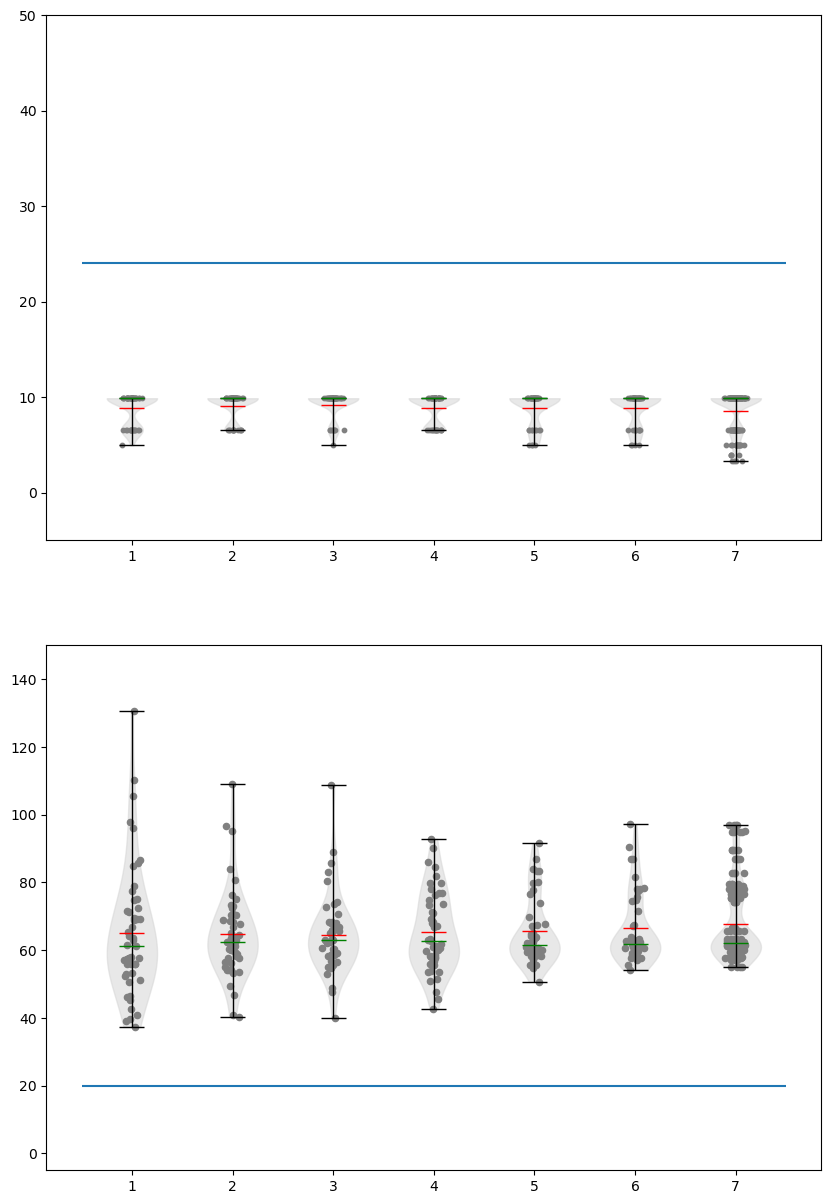

In [73]:
fig, ax = plt.subplots(2,1)
# results["init_translation_r"] = 1/results["init_translation_r"]
# results.boxplot(['elongation_r'] , 
#                by=['dt', 'long_track'], 
#                grid=False, 
#                ax = ax[0],
#                rot=90, 
#                 boxprops=dict(linestyle='-', linewidth=1.5, color="black"),
#                medianprops=dict(linestyle='-', linewidth=1.5, color="red"),
#               )

50,100,150, 200, 500
violin = ax[0].violinplot(dataset = [
#     results[(results.dt == 0.1) & (results.long_track == 50)]["elongation_r"].values,
#     results[(results.dt == 0.1) & (results.long_track == 100)]["elongation_r"].values,
#     results[(results.dt == 0.1) & (results.long_track == 150)]["elongation_r"].values,
#     results[(results.dt == 0.1) & (results.long_track == 200)]["elongation_r"].values,
#     results[(results.dt == 0.1) & (results.long_track == 500)]["elongation_r"].values,
#     results[(results.dt == 0.1) & (results.long_track == 1000)]["elongation_r"].values,
#     results[(results.dt == 0.1) & (results.long_track == 5000)]["elongation_r"].values,
#     results[(results.dt == 0.1) & (results.long_track == 10000)]["elongation_r"].values,
#     results[(results.dt == 0.1) & (results.long_track == 20000)]["elongation_r"].values,
#     results[(results.dt == 0.1) & (results.long_track == 50000)]["elongation_r"].values,
#     results[(results.dt == 1.0) & (results.long_track == 50)]["elongation_r"].values,
#     results[(results.dt == 1.0) & (results.long_track == 100)]["elongation_r"].values,
#     results[(results.dt == 1.0) & (results.long_track == 150)]["elongation_r"].values,
#     results[(results.dt == 1.0) & (results.long_track == 200)]["elongation_r"].values,
#     results[(results.dt == 1.0) & (results.long_track == 500)]["elongation_r"].values,
#     results[(results.dt == 1.0) & (results.long_track == 1000)]["elongation_r"].values,
#     results[(results.dt == 1.0) & (results.long_track == 5000)]["elongation_r"].values,
#     results[(results.dt == 1.0) & (results.long_track == 10000)]["elongation_r"].values,
#     results[(results.dt == 1.0) & (results.long_track == 20000)]["elongation_r"].values,
#     results[(results.dt == 1.0) & (results.long_track == 50000)]["elongation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 50) & (results.elongation_r>0)]["elongation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 100) & (results.elongation_r>0)]["elongation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 150) & (results.elongation_r>0)]["elongation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 200) & (results.elongation_r>0)]["elongation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 500) & (results.elongation_r>0)]["elongation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 1000) & (results.elongation_r>0)]["elongation_r"].values,
    results[(results.dt == 60.0) & (results.long_track > 1000) & (results.elongation_r>0)]["elongation_r"].values
    ],
     showmeans=True,
      showmedians=True)

for pc in violin["bodies"]:
    pc.set_facecolor("lightgrey")
    pc.set_edgecolor("lightgrey")
    pc.set_alpha(0.5)
    
colors = ["black", "black", "black", "red", "green"]
i=0
for partname in ('cbars','cmins','cmaxes','cmeans','cmedians'):
    vp = violin[partname]
    vp.set_edgecolor(colors[i])
    vp.set_linewidth(1)
    i+=1
# results.boxplot(['init_translation_r'] , 
#                by=['dt', "long_track"], 
#                grid=False, 
#                ax = ax[1],
#                rot=90,
#                boxprops=dict(linestyle='-', linewidth=1.5, color="black"),
#                medianprops=dict(linestyle='-', linewidth=1.5, color="red"),
#                )


violin = ax[1].violinplot(dataset = [
#     results[(results.dt == 0.1) & (results.long_track == 50)]["init_translation_r"].values,
#     results[(results.dt == 0.1) & (results.long_track == 100)]["init_translation_r"].values,
#     results[(results.dt == 0.1) & (results.long_track == 150)]["init_translation_r"].values,
#     results[(results.dt == 0.1) & (results.long_track == 200)]["init_translation_r"].values,
#     results[(results.dt == 0.1) & (results.long_track == 500)]["init_translation_r"].values,
#     results[(results.dt == 0.1) & (results.long_track == 1000)]["init_translation_r"].values,
#     results[(results.dt == 0.1) & (results.long_track == 5000)]["init_translation_r"].values,
#     results[(results.dt == 0.1) & (results.long_track == 10000)]["init_translation_r"].values,
#     results[(results.dt == 0.1) & (results.long_track == 20000)]["init_translation_r"].values,
#     results[(results.dt == 0.1) & (results.long_track == 50000)]["init_translation_r"].values,
#     results[(results.dt == 1.0) & (results.long_track == 50)]["init_translation_r"].values,
#     results[(results.dt == 1.0) & (results.long_track == 100)]["init_translation_r"].values,
#     results[(results.dt == 1.0) & (results.long_track == 150)]["init_translation_r"].values,
#     results[(results.dt == 1.0) & (results.long_track == 200)]["init_translation_r"].values,
#     results[(results.dt == 1.0) & (results.long_track == 500)]["init_translation_r"].values,
#     results[(results.dt == 1.0) & (results.long_track == 1000)]["init_translation_r"].values,
#     results[(results.dt == 1.0) & (results.long_track == 5000)]["init_translation_r"].values,
#     results[(results.dt == 1.0) & (results.long_track == 10000)]["init_translation_r"].values,
#     results[(results.dt == 1.0) & (results.long_track == 20000)]["init_translation_r"].values,
#     results[(results.dt == 1.0) & (results.long_track == 50000)]["init_translation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 50) & (results.elongation_r>0)]["init_translation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 100) & (results.elongation_r>0)]["init_translation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 150) & (results.elongation_r>0)]["init_translation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 200) & (results.elongation_r>0)]["init_translation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 500) & (results.elongation_r>0)]["init_translation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 1000) & (results.elongation_r>0)]["init_translation_r"].values,
    results[(results.dt == 60.0) & (results.long_track > 1000) & (results.elongation_r>0)]["init_translation_r"].values
    ],
     showmeans=True,
      showmedians=True)

for pc in violin["bodies"]:
    pc.set_facecolor("lightgrey")
    pc.set_edgecolor("lightgrey")
    pc.set_alpha(0.5)
    
colors = ["black", "black", "black", "red", "green"]
i=0
for partname in ('cbars','cmins','cmaxes','cmeans','cmedians'):
    vp = violin[partname]
    vp.set_edgecolor(colors[i])
    vp.set_linewidth(1)
    i+=1

group = ['dt', "long_track"]
column = 'elongation_r'
grouped = results.groupby(group)
names, vals, xs = [], [] ,[]
for i, (name, subdf) in enumerate(grouped):
    if name[0] == 60:
        names.append(name)
        vals.append(subdf[column][subdf[column]>0].to_list())
        xs.append(np.random.normal(i+1-20, 0.04, subdf[column][subdf[column]>0].shape[0]))
clevels = np.linspace(0., 1., len(grouped))
for x, val, clevel in zip(xs, vals, clevels):
    ax[0].scatter(x, val, c='grey', alpha=1, s=10)
    
group = ['dt', "long_track"]
column = 'init_translation_r'
grouped = results.groupby(group)
names, vals, xs = [], [] ,[]
for i, (name, subdf) in enumerate(grouped):
    if name[0] == 60:
        names.append(name)
        vals.append(subdf[column][subdf[column]>0].to_list())
        xs.append(np.random.normal(i+1-20, 0.04, subdf[column][subdf[column]>0].shape[0]))
clevels = np.linspace(0., 1., len(grouped))
for x, val, clevel in zip(xs, vals, clevels):
    ax[1].scatter(x, val, c='grey', alpha=1, s=20)
    
ax[0].set_ylim(-5,50)
ax[1].set_ylim(-5, 150)
ax[0].hlines(24, 0.5, 7.5)
ax[1].hlines(1/0.05, 0.5, 7.5)
fig.set_size_inches((10,15))
fig.savefig(os.path.join(path_save, "results_delta_t_length_boxplot_linear_diff_60.eps"), dpi=300)

In [56]:
results[(results.dt == 60.0) & (results.long_track >1000) & (results.elongation_r>0)]

,elongation_r,init_translation_r,dt,long_track,id
2175,6.588889,77.911743,60.0,1364,0
2183,9.883333,62.097059,60.0,1364,8
2184,9.883333,61.916483,60.0,1364,9
2188,9.883333,58.012350,60.0,1364,13
2189,6.588889,77.330932,60.0,1364,14
...,...,...,...,...,...
2964,6.588889,78.942728,60.0,1364,89
2966,9.883333,57.874484,60.0,1364,91
2967,9.883333,61.469898,60.0,1364,92
2970,9.883333,66.423445,60.0,1364,95
